# Prepare .mat files for modeling with GBIS

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100705.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 124795
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosAT424_20080929_20100705.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosAT424_20080929_20100705.mat
showing...


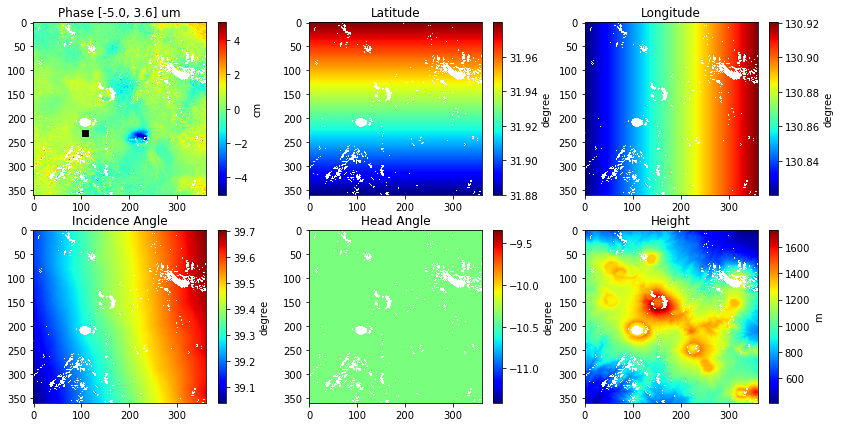

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data
number of pixels: 117334
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosDT73_20081012_20100302.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlosDT73_20081012_20100302.mat
showing...


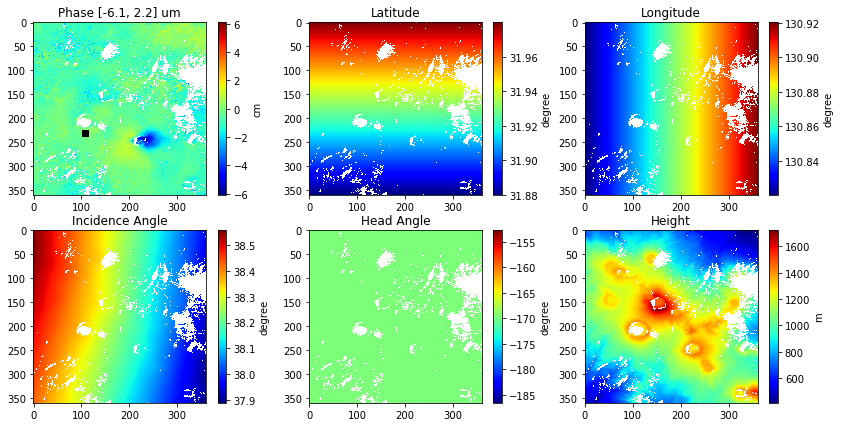

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data --mask /Users/yunjunz/insarlab/Kirishima/Model/data/maskShinmoeCrater2017pre.h5
number of pixels: 290064
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2AT131_20150106_20171010.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2AT131_20150106_20171010.mat
showing...


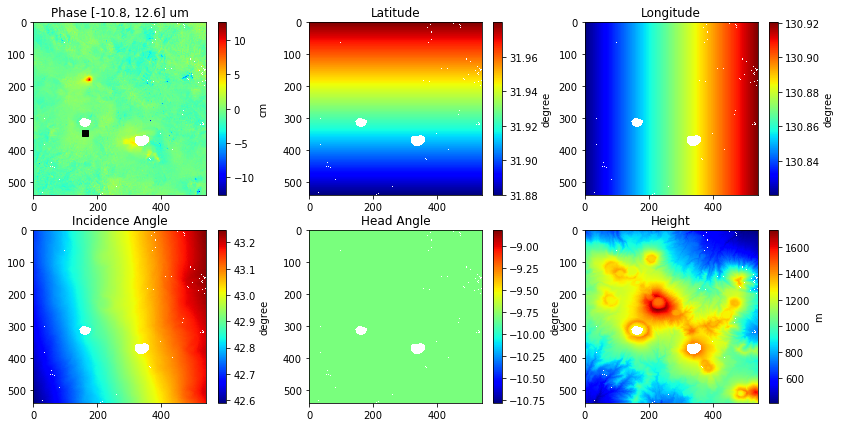

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data --mask /Users/yunjunz/insarlab/Kirishima/Model/data/maskShinmoeCrater2017pre.h5
number of pixels: 274067
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2DT23_20150209_20170918.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2DT23_20150209_20170918.mat
showing...


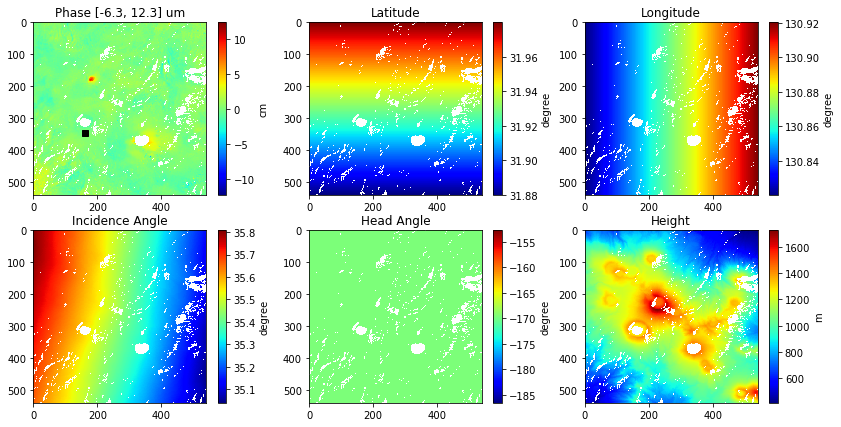

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy_all/20150106_20190702.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy_all/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data --mask /Users/yunjunz/insarlab/Kirishima/Model/data/maskShinmoeCrater2017pre.h5
number of pixels: 289244
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2AT131_20150106_20190702.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2AT131_20150106_20190702.mat
showing...


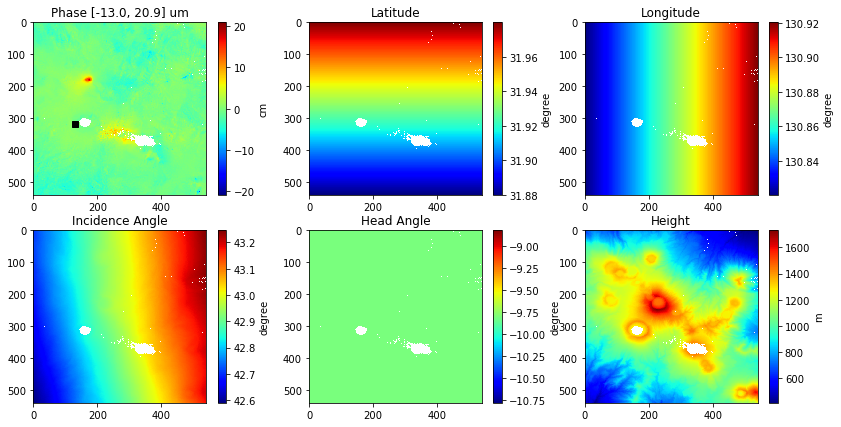

save_gbis.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy_all/20150209_20190819.unw -g /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy_all/inputs/geometryGeo.h5 --out-dir /Users/yunjunz/insarlab/Kirishima/Model/data --mask /Users/yunjunz/insarlab/Kirishima/Model/data/maskShinmoeCrater2017pre.h5
number of pixels: 273759
saved figure to /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2DT23_20150209_20190819.png
save to file: /Users/yunjunz/insarlab/Kirishima/Model/data/KirishimaAlos2DT23_20150209_20190819.mat
showing...


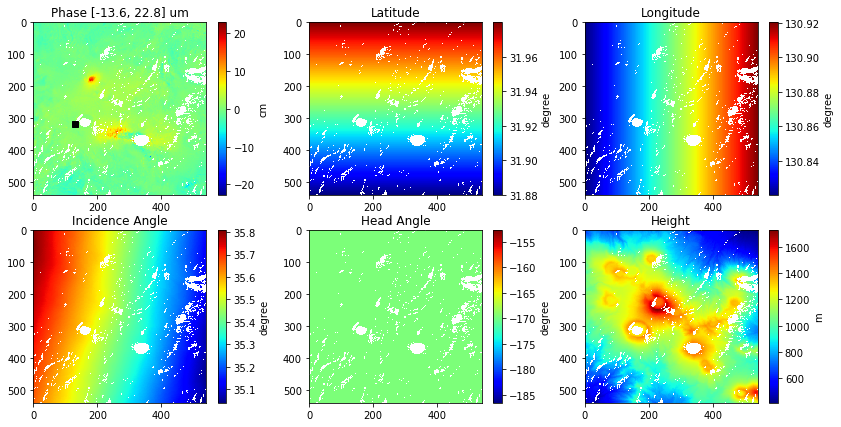

Done.


In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from mintpy.utils import readfile
from mintpy import save_gbis


## Common setting
out_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')

## Dataset Initiation
proj_names = [
    'KirishimaAlosAT424/mintpy',
    'KirishimaAlosDT73/mintpy',
    'KirishimaAlos2AT131/mintpy',
    'KirishimaAlos2DT23/mintpy',
    'KirishimaAlos2AT131/mintpy_all',
    'KirishimaAlos2DT23/mintpy_all',
]

for proj_name in proj_names:
    # grab project and file names
    proj_dir = os.path.expanduser('~/insarlab/Kirishima/{}'.format(proj_name))
    vel_file = os.path.join(proj_dir, 'velocity.h5')
    date12 = readfile.read_attribute(vel_file)['DATE12']
    unw_file = os.path.join(proj_dir, '{}.unw'.format(date12))
    geom_file = os.path.join(proj_dir, 'inputs/geometryGeo.h5')

    # run
    scp_args = '{} -g {} --out-dir {}'.format(unw_file, geom_file, out_dir)
    # mask out the crater for the Shinmoe-dake 2017 pre-eruptive signal
    if 'Alos2' in proj_name:
        mask_aoi_file = os.path.join(out_dir, 'maskShinmoeCrater2017pre.h5')
        scp_args += ' --mask {} '.format(mask_aoi_file)
    #if 'Alos2' not in proj_name:
    #    scp_args += ' --ref-lalo 31.93 130.864 '
    mat_file = save_gbis.main(scp_args.split())
print('Done.')